# Base para o flash Report

#### Importando as bibliotecas

In [9]:
import pandas as pd

#### importar dados da planilha de faturamento


In [11]:
tabela = pd.read_excel('Base_faturamento.xlsx')

### Porcentagem de crescimento no faturamento com imposto por cliente no mês de agosto de 2024 e faça um grafico de barras com a porcentagem e os 10 com maior variação positiva

##### Filtrar os dados para o mês de agosto de 2024

In [13]:
agosto_2024 = tabela[(tabela['Data Emissão'] >= '2024-08-01') & (tabela['Data Emissão'] <= '2024-08-31')]

#### Agrupar os dados por cliente e calcular o faturamento total com impostos

In [15]:
faturamento_agosto = agosto_2024.groupby('Cliente')['Valor com imposto'].sum()

#### Calcular a variação percentual do faturamento com impostos em relação ao mês anterior
#### Para simplificar, vamos assumir que o mês anterior é julho de 2024
#### Você precisará ajustar o código para pegar os dados do mês anterior real

In [22]:
julho_2024 = tabela[(tabela['Data Emissão'] >= '2024-07-01') & (tabela['Data Emissão'] <= '2024-07-31')]
faturamento_julho = julho_2024.groupby('Cliente')['Valor com imposto'].sum()

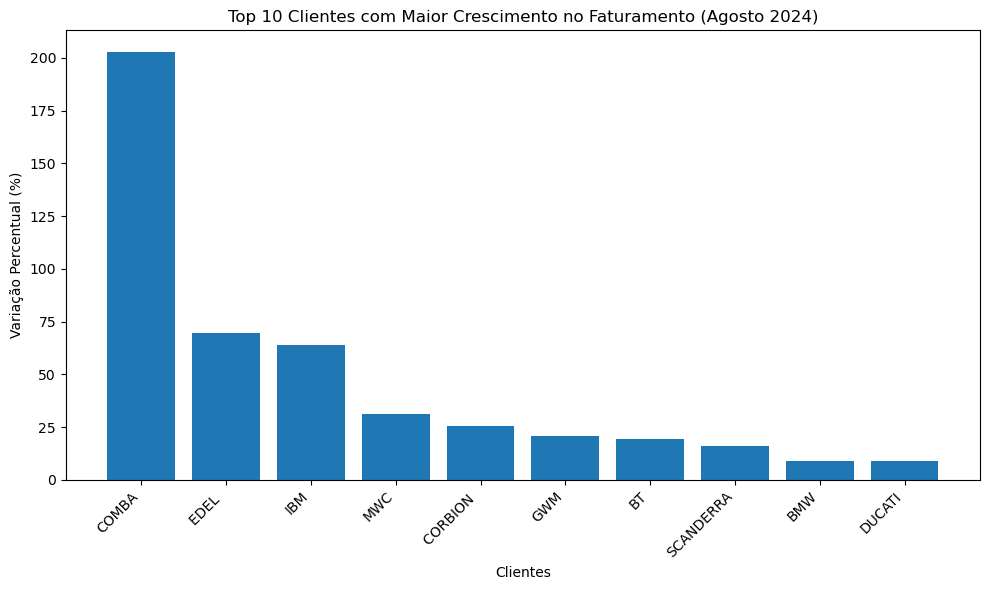

In [21]:
variacao_percentual = (faturamento_agosto - faturamento_julho) / faturamento_julho * 100
variacao_percentual = variacao_percentual.fillna(0)  # Substituir valores NaN por 0

# Ordenar a variação percentual em ordem decrescente
variacao_percentual_ordenada = variacao_percentual.sort_values(ascending=False)

# Selecionar os 5 clientes com maior variação positiva
top_5 = variacao_percentual_ordenada.head(10)

# Criar o gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_5.index, top_5.values)
plt.xlabel('Clientes')
plt.ylabel('Variação Percentual (%)')
plt.title('Top 10 Clientes com Maior Crescimento no Faturamento (Agosto 2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Aumento nas posições porta pallet dos clientes com base na data de emissão

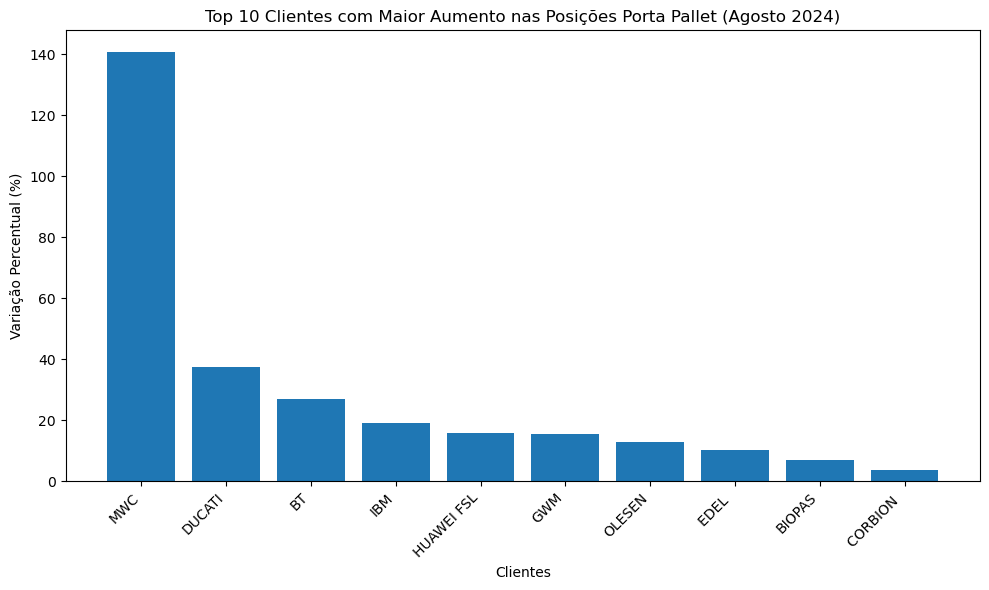

In [23]:
# Filtrar os dados para o mês de agosto de 2024
agosto_2024 = tabela[(tabela['Data Emissão'] >= '2024-08-01') & (tabela['Data Emissão'] <= '2024-08-31')]

# Agrupar os dados por cliente e calcular a soma das posições porta pallet
posicoes_porta_pallet_agosto = agosto_2024.groupby('Cliente')['OCUPAÇÃO'].sum()

# Calcular a variação percentual das posições porta pallet em relação ao mês anterior
# Para simplificar, vamos assumir que o mês anterior é julho de 2024
# Você precisará ajustar o código para pegar os dados do mês anterior real
julho_2024 = tabela[(tabela['Data Emissão'] >= '2024-07-01') & (tabela['Data Emissão'] <= '2024-07-31')]
posicoes_porta_pallet_julho = julho_2024.groupby('Cliente')['OCUPAÇÃO'].sum()

# Import the NumPy library
import numpy as np

# Calcular a variação percentual, tratando divisões por zero
variacao_percentual_posicoes = (posicoes_porta_pallet_agosto - posicoes_porta_pallet_julho) / posicoes_porta_pallet_julho.replace(0, np.nan) * 100
variacao_percentual_posicoes = variacao_percentual_posicoes.fillna(0)  # Substituir valores NaN por 0

# Ordenar a variação percentual em ordem decrescente
variacao_percentual_ordenada_posicoes = variacao_percentual_posicoes.sort_values(ascending=False)

# Selecionar os 5 clientes com maior variação positiva
top_5_posicoes = variacao_percentual_ordenada_posicoes.head(10)

# Criar o gráfico de barras
import matplotlib.pyplot as plt # Make sure to import matplotlib

plt.figure(figsize=(10, 6))
plt.bar(top_5_posicoes.index, top_5_posicoes.values)
plt.xlabel('Clientes')
plt.ylabel('Variação Percentual (%)')
plt.title('Top 10 Clientes com Maior Aumento nas Posições Porta Pallet (Agosto 2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

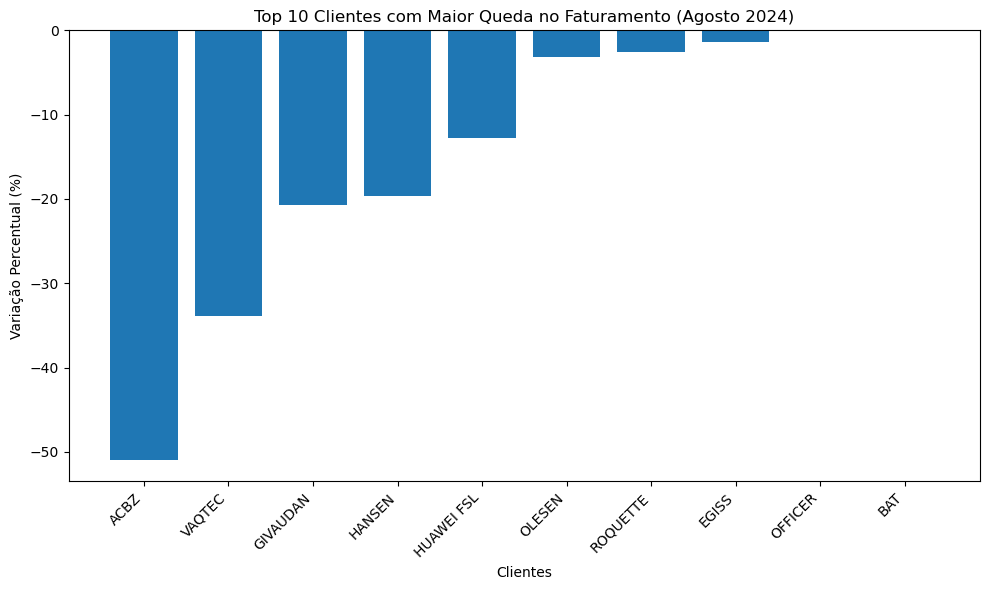

In [24]:
# prompt: Clientes que tiveram uma queda no faturamento no mes de agosto em porcentagem e gere um grafico de barras dos 10 clientes com maior queda

# Ordenar a variação percentual em ordem crescente
variacao_percentual_ordenada_queda = variacao_percentual.sort_values()

# Selecionar os 10 clientes com maior queda
top_10_queda = variacao_percentual_ordenada_queda.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_queda.index, top_10_queda.values)
plt.xlabel('Clientes')
plt.ylabel('Variação Percentual (%)')
plt.title('Top 10 Clientes com Maior Queda no Faturamento (Agosto 2024)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\leonardo.sales\AppData\Local\Temp\3\ipykernel_41356\3932569154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente_acbz['Mês'] = cliente_acbz['Data Emissão'].dt.month


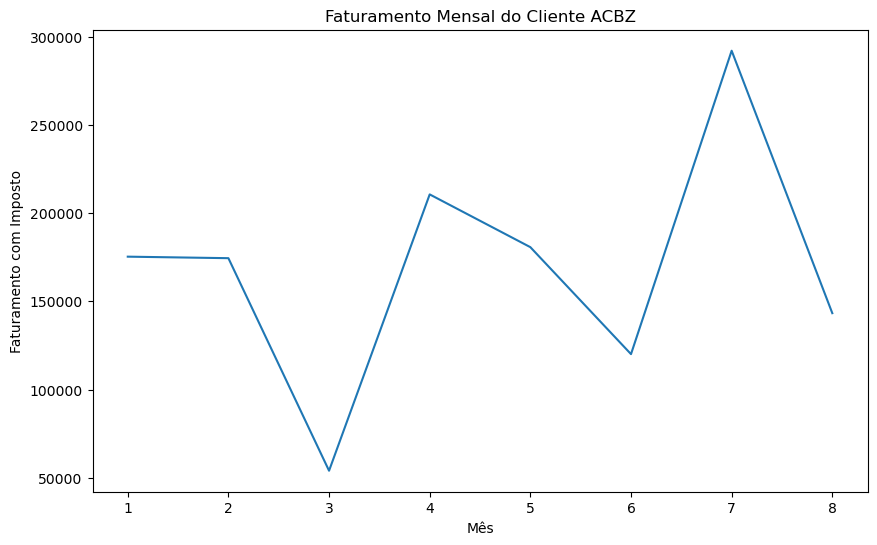

ModuleNotFoundError: No module named 'prophet'

In [25]:
# prompt: Analise preditiva do cliente ACBZ para o valor de faturamento até o final do ano de 2024

# Filtrar os dados para o cliente ACBZ
cliente_acbz = tabela[tabela['Cliente'] == 'ACBZ']

# Criar uma nova coluna com o mês da data de emissão
cliente_acbz['Mês'] = cliente_acbz['Data Emissão'].dt.month

# Agrupar os dados por mês e calcular o faturamento total com impostos
faturamento_acbz_mensal = cliente_acbz.groupby('Mês')['Valor com imposto'].sum()

# Criar um gráfico de linha para visualizar o faturamento mensal do cliente ACBZ
plt.figure(figsize=(10, 6))
plt.plot(faturamento_acbz_mensal.index, faturamento_acbz_mensal.values)
plt.xlabel('Mês')
plt.ylabel('Faturamento com Imposto')
plt.title('Faturamento Mensal do Cliente ACBZ')
plt.show()

# Para a análise preditiva, você pode usar modelos de séries temporais como ARIMA ou Prophet.
# Aqui está um exemplo básico usando a biblioteca Prophet:

from prophet import Prophet

# Preparar os dados para o Prophet
df_prophet = cliente_acbz[['Data Emissão', 'Valor com imposto']].rename(
    columns={'Data Emissão': 'ds', 'Valor com imposto': 'y'}
)

# Criar o modelo Prophet
model = Prophet()

# Ajustar o modelo aos dados
model.fit(df_prophet)

# Criar um dataframe com as datas futuras para a previsão
future = model.make_future_dataframe(periods=12 - 8)  # Prever até o final do ano (12 meses)

# Fazer a previsão
forecast = model.predict(future)

# Plotar a previsão
fig = model.plot(forecast)
plt.title('Previsão do Faturamento do Cliente ACBZ até o Final de 2024')
plt.show()

# Você pode ajustar o modelo e a previsão com base nos seus dados e requisitos específicos.
